# Read new desisim format files (including master file)

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

In [3]:
#Open master file file
basedir='../example_data/new_format/'
master = fits.open(basedir+'master.fits')
master.info()

Filename: ../example_data/new_format/master.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU       4   ()      
  1  METADATA    BinTableHDU     21   384R x 5C   [E, E, E, 10A, J]   


In [4]:
nside=master[1].header['NSIDE']
print('Nside =',nside)

Nside = 16


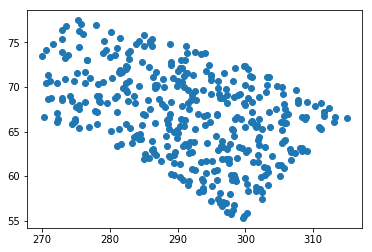

In [5]:
data=master['METADATA'].data
ra=data['RA']
dec=data['DEC']
zq=data['Z']
mockid=data['MOCKID']
pix=data['PIXNUM']
plt.plot(ra,dec,'o')

In [6]:
# open one of the pixel files with skewers
ipix = pix[0]
filename=basedir+str(ipix//100)+"/"+str(ipix)+"/transmission-"+str(nside)+"-"+str(ipix)+".fits"
pix_file = fits.open(filename)
pix_file.info()

Filename: ../example_data/new_format/28/2884/transmission-16-2884.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU       7   ()      
  1  METADATA    BinTableHDU     17   25R x 4C   [E, E, E, 10A]   
  2  WAVELENGTH  ImageHDU         7   (524,)   float32   
  3  TRANSMISSION  ImageHDU         8   (25, 524)   float32   


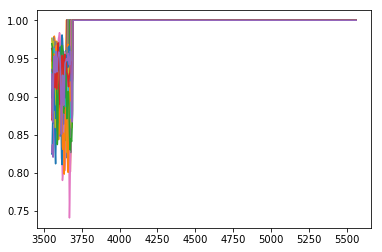

In [7]:
# get arraw with log(lambda) in each cell of grid
wave = pix_file['WAVELENGTH'].data
flux = pix_file['TRANSMISSION'].data
Nq = flux.shape[1]
for i in range(Nq):
    plt.plot(wave,flux[:,i])